<a href="https://colab.research.google.com/github/hshs1115/ML/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mglearn

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=89f0e76eb2fc0dcd82d9103aad2822fe37856b686b64916e84ac64c72694858b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings(action='ignore') 

random.seed(2020)


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/letter-recognition.data', names = ['class', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'])
df

,class,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
# 그나마 차이를 보이는 알파벳 A, O, V를 추림
df = df[(df['class']=='A') | (df['class']=='O') | (df['class']=='V')]

# 가시성 좋은 시각화를 위해 30%만 추출
df = df.sample(frac = 0.3)

In [ ]:
x = df.drop(['class'], axis = 1).values
x

array([[3, 4, 6, ..., 6, 3, 9],
       [5, 9, 6, ..., 9, 3, 7],
       [4, 8, 6, ..., 8, 3, 8],
       ...,
       [4, 9, 6, ..., 7, 3, 8],
       [2, 7, 4, ..., 6, 2, 8],
       [2, 3, 3, ..., 8, 2, 8]])

In [ ]:
y = df[['class']]
y

,class
1042,A
6632,O
16957,O
5325,A
17555,A
...,...
155,O
18403,O
3802,A
19056,A


In [ ]:
# 데이터 스케일링

from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.552041,-1.000271,0.536598,0.302520,-0.594869,0.767133,-1.232727,-0.641151,-0.15126,0.077218,-1.126964,0.750168,-0.093553,-1.157289,0.165009,1.107149
1,0.623381,0.546862,0.536598,0.772956,1.455687,-0.177451,-0.281373,1.531604,0.42386,-0.529998,-0.359386,-0.109296,-0.093553,0.446537,0.165009,-0.644044
2,0.035670,0.237436,0.536598,0.302520,0.430409,-0.177451,0.352862,1.531604,1.57410,-0.529998,0.152332,-0.109296,-0.722085,-0.088071,0.165009,0.231552
3,0.035670,0.856289,-0.089584,0.772956,0.430409,0.767133,-0.915609,-0.641151,-1.30150,0.077218,-1.126964,-0.109296,-0.722085,-0.622680,-0.408791,0.231552
4,2.974224,2.403422,1.162781,1.243392,0.430409,0.294841,-1.866963,-1.075702,-0.72638,0.684434,-0.615245,3.328558,0.534978,-1.691897,1.312608,-1.519641


In [ ]:
# 데이터 정규화
def standardization(Data):
    Input = ((Data[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']] - np.mean(Data[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']], axis=0)) / np.std(Data[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']], axis=0))
    return(pd.concat([Input, Data['class']], axis=1))

df = standardization(df)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,class
1042,-0.552041,-1.000271,0.536598,0.302520,-0.594869,0.767133,-1.232727,-0.641151,-0.15126,0.077218,-1.126964,0.750168,-0.093553,-1.157289,0.165009,1.107149,A
6632,0.623381,0.546862,0.536598,0.772956,1.455687,-0.177451,-0.281373,1.531604,0.42386,-0.529998,-0.359386,-0.109296,-0.093553,0.446537,0.165009,-0.644044,O
16957,0.035670,0.237436,0.536598,0.302520,0.430409,-0.177451,0.352862,1.531604,1.57410,-0.529998,0.152332,-0.109296,-0.722085,-0.088071,0.165009,0.231552,O
5325,0.035670,0.856289,-0.089584,0.772956,0.430409,0.767133,-0.915609,-0.641151,-1.30150,0.077218,-1.126964,-0.109296,-0.722085,-0.622680,-0.408791,0.231552,A
17555,2.974224,2.403422,1.162781,1.243392,0.430409,0.294841,-1.866963,-1.075702,-0.72638,0.684434,-0.615245,3.328558,0.534978,-1.691897,1.312608,-1.519641,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.552041,-1.309698,-0.089584,-0.167916,-0.594869,0.767133,-0.281373,1.966155,2.14922,-0.529998,-0.359386,1.609631,-0.093553,-0.088071,0.738808,0.231552,O
18403,0.035670,0.856289,-0.089584,1.243392,0.943048,0.294841,0.035744,1.097053,0.42386,0.684434,-0.359386,-1.828223,-0.093553,-0.088071,0.165009,-0.644044,O
3802,0.035670,0.546862,0.536598,0.772956,0.430409,2.184008,-1.549845,-0.641151,-0.72638,1.291650,-1.126964,0.750168,-0.722085,-0.622680,0.165009,0.231552,A
19056,-1.139751,-0.071991,-0.715766,-0.167916,-0.082230,2.184008,-0.915609,-0.641151,-0.72638,0.684434,-1.126964,0.750168,-0.722085,-1.157289,-0.408791,0.231552,A


In [ ]:
# 주성분을 2개로 PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

In [ ]:
principalDf

,principal component1,principal component2
0,-1.227941,2.052985
1,1.803515,0.343406
2,0.966529,-0.357662
3,-0.356510,1.656795
4,2.538838,3.838576
...,...,...
687,-0.465268,0.725672
688,1.433229,0.143181
689,-0.237626,2.891438
690,-2.093268,2.331151


In [ ]:
principalDf['class'] = y.values
principalDf

,principal component1,principal component2,class
0,-1.227941,2.052985,A
1,1.803515,0.343406,O
2,0.966529,-0.357662,O
3,-0.356510,1.656795,A
4,2.538838,3.838576,A
...,...,...,...
687,-0.465268,0.725672,O
688,1.433229,0.143181,O
689,-0.237626,2.891438,A
690,-2.093268,2.331151,A


In [ ]:
print(principalDf.groupby(['class']).count() )

       principal component1  principal component2
class                                            
A                       229                   229
O                       234                   234
V                       229                   229


Text(0.5, 1.0, 'Data')

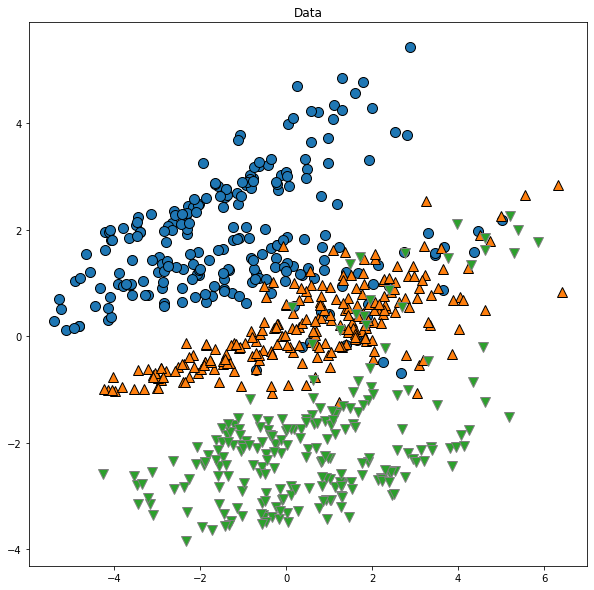

In [ ]:
#간단하게 시각화
fig, axes = plt.subplots(1, 1,figsize=(10,10))

Data = principalDf
mglearn.discrete_scatter(Data['principal component1'], Data['principal component2'], Data['class'], ax=axes, s=10)
axes.set_title("Data")

# K-Means 알고리즘

In [ ]:
# K-Means 클러스터링 함수 실행 후 차트 가시화
def k_Means_Plot(Data, Select_k, NAME, Init_Method = 'k-means++', Num_Init=10):
    Data2 = Data[['principal component1', 'principal component2']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i, init=Init_Method, random_state=2020, n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2['principal component1'], Data2['principal component2'], Kmeans_Clustering.labels_, ax=axes[i - 2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], 
                                 Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), 
                                 markeredgewidth=3, 
                                 ax=axes[i - 2], s=10)
        Score = np.round(silhouette_score(Data2, Kmeans_Clustering.labels_),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

# 산점도 가시화
def Simple_Scatter(Data, Name):
    G = sns.jointplot(x = 'principal component1', y = 'principal component2', data = Data, kind='scatter', hue = "class")
    G.fig.suptitle("Data : " + Name, fontsize = 10, color = 'black', alpha = 0.9)

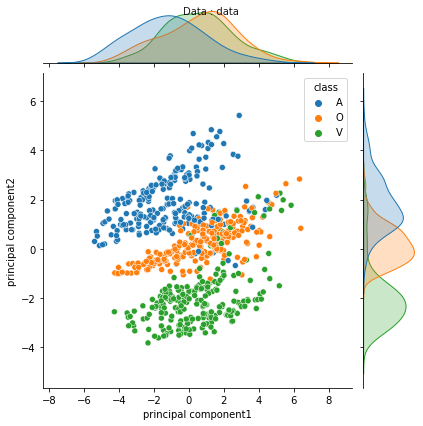

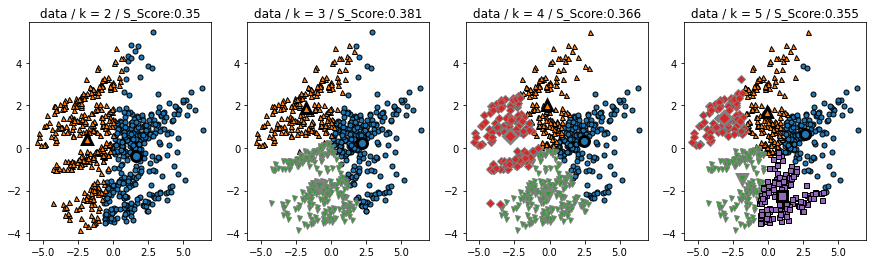

In [ ]:
Simple_Scatter(principalDf, "data")

k_Means_Plot(Data = principalDf,
                 Select_k = range(2, 6),
                 NAME = "data",
                 Init_Method='random',Num_Init=1)

# K-Means++ 알고리즘


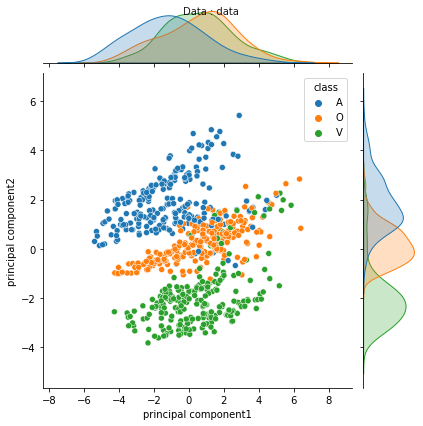

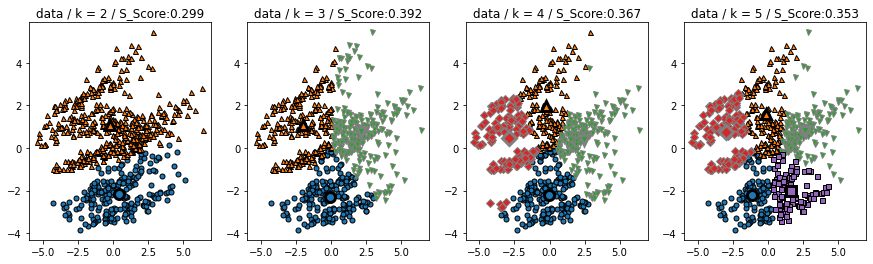

In [ ]:
Simple_Scatter(principalDf, "data")
    
k_Means_Plot(Data = principalDf,
              Select_k = range(2, 6),
              NAME = "data",
              Init_Method='k-means++',Num_Init=1)

# Herarchical clustering

In [ ]:
def Fixed_Dendrogram(Data, Num_of_p, Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use == True):
        Num_of_p = np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode = 'lastp',  
        p = Num_of_p, 
        leaf_rotation = 90.,
        leaf_font_size = 12.,
        color_threshold = 'default'
    )
    plt.show()

dendrogram 시각화

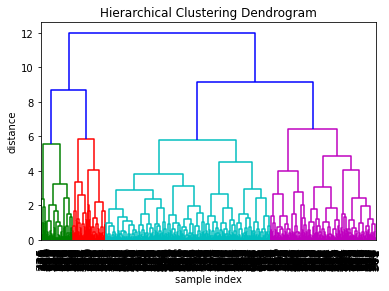

In [ ]:
Fixed_Dendrogram(principalDf[['principal component1','principal component2']], -1, True) # -1: nomeaningful value

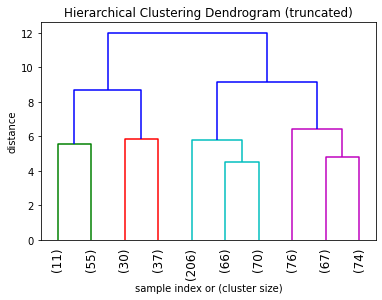

In [ ]:
#### 10 cluster만 생성
a = Fixed_Dendrogram(principalDf[['principal component1','principal component2']], 10, False)

In [ ]:
def Hclust_Plot(Data,Select_k,NAME):
    Data2 = Data[['principal component1', 'principal component2']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels = H_Clustering.fit_predict(Data2)
        mglearn.discrete_scatter(Data2['principal component1'], Data2['principal component2'], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" + NAME + ' / k = ' + str(i))
        Score=np.round(silhouette_score(Data2,P_Labels),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

HC의 예측 결과 가시화

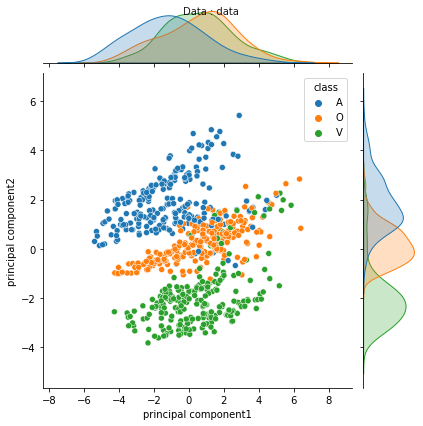

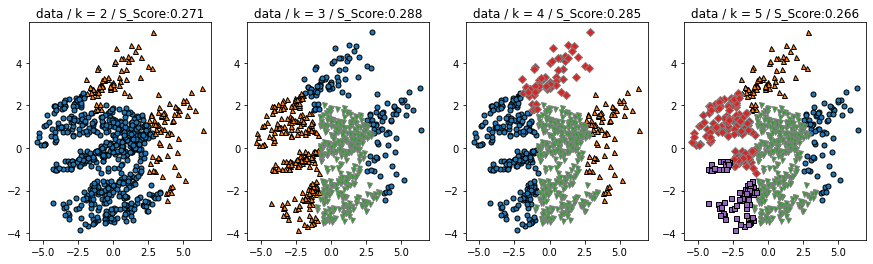

In [ ]:
Simple_Scatter(principalDf, "data")
Hclust_Plot(principalDf,
            range(2, 6), "data")

## DBSCAN clustering

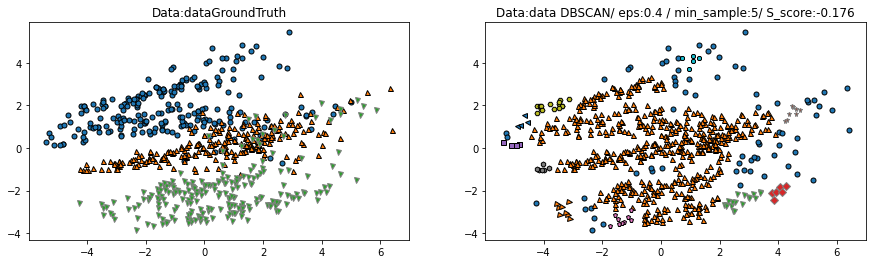

In [ ]:
def DBSCAN_Plot(Data,NAME,min_samples=5,eps=0.4):
    Data2 = Data[['principal component1', 'principal component2']]
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data2)
    Score=np.round(silhouette_score(Data2,Results),3)
    mglearn.discrete_scatter(Data2['principal component1'], Data2['principal component2'], Data['class'], ax=axes[0], s=5)
    axes[0].set_title("Data:" + NAME + 'GroundTruth')    
    mglearn.discrete_scatter(Data2['principal component1'], Data2['principal component2'], Results, ax=axes[1], s=5)
    axes[1].set_title("Data:" + NAME + ' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))


DBSCAN_Plot(Data=principalDf,NAME="data")

DBSCAN의 hyperparmeters를 튜닝

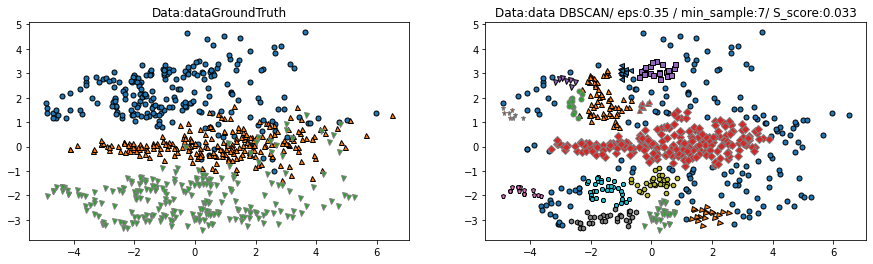

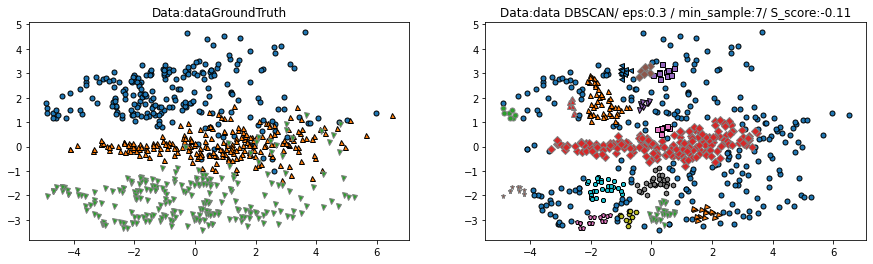

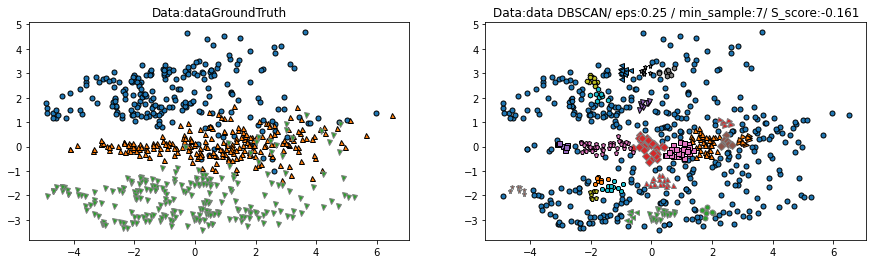

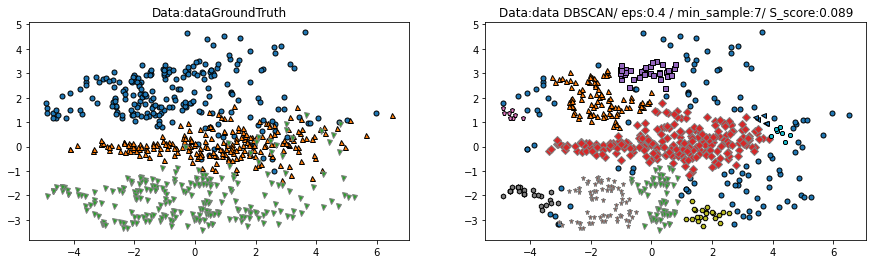

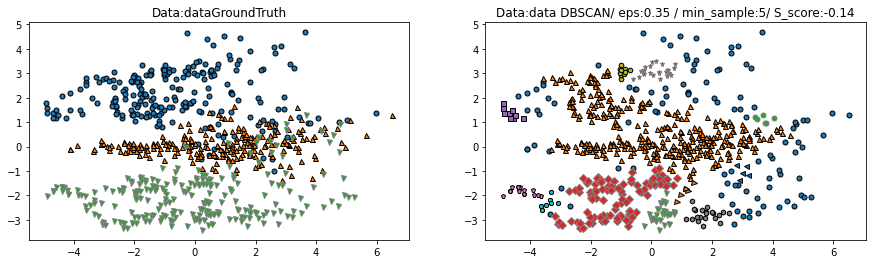

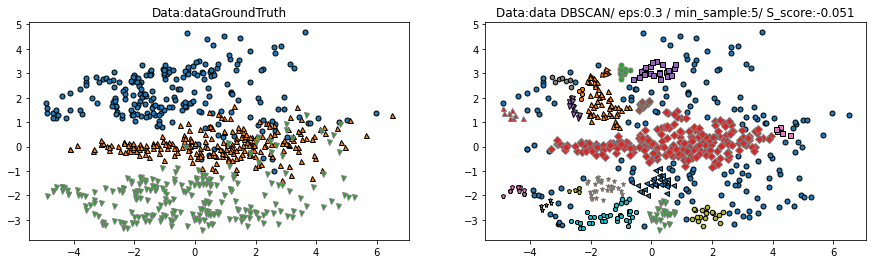

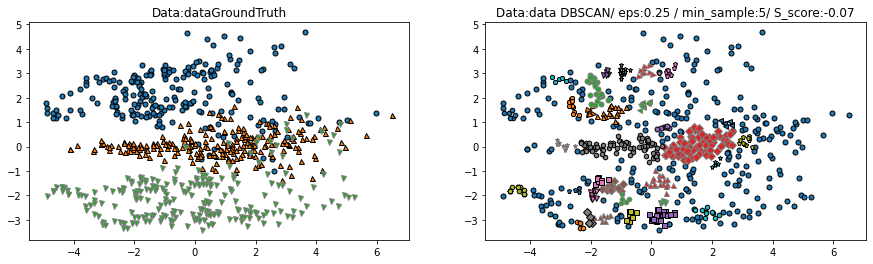

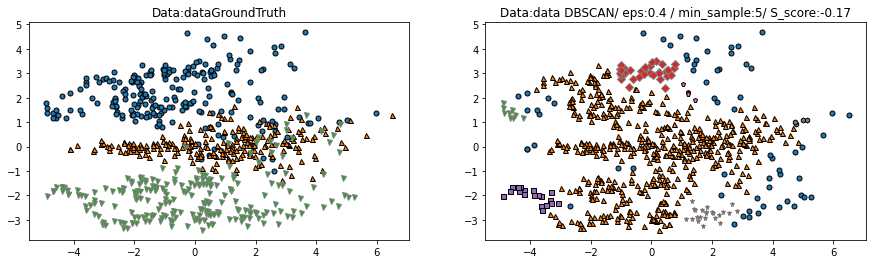

In [ ]:
DBSCAN_Plot(Data=principalDf,NAME="data",min_samples=7,eps=0.35)
DBSCAN_Plot(Data=principalDf,NAME="data",min_samples=7,eps=0.30)
DBSCAN_Plot(Data=principalDf,NAME="data",min_samples=7,eps=0.25)
DBSCAN_Plot(Data=principalDf,NAME="data",min_samples=7,eps=0.40)
DBSCAN_Plot(Data=principalDf,NAME="data",min_samples=5,eps=0.35)
DBSCAN_Plot(Data=principalDf,NAME="data",min_samples=5,eps=0.30)
DBSCAN_Plot(Data=principalDf,NAME="data",min_samples=5,eps=0.25)
DBSCAN_Plot(Data=principalDf,NAME="data",min_samples=5,eps=0.40)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import RobustScaler

In [ ]:
sidf = principalDf
sidf['label'] = 0
sidf0 = sidf[sidf['class'] == 'A']
sidf1 = sidf[sidf['class'] == 'O']
sidf1['label'] = 1
sidf2 = sidf[sidf['class'] == 'V']
sidf2['label'] = 2

ssdf = pd.concat([sidf0, sidf1, sidf2])
ssdf

,principal component1,principal component2,class,label
0,-1.227941,2.052985,A,0
3,-0.356510,1.656795,A,0
4,2.538838,3.838576,A,0
7,-2.280382,2.446665,A,0
8,0.151037,1.315494,A,0
...,...,...,...,...
662,2.306436,-0.215891,V,2
663,0.902241,-2.248831,V,2
671,1.077177,-1.567204,V,2
675,0.719277,-1.633521,V,2


In [ ]:
X = ssdf[['principal component1', 'principal component2']].values
labels_true = ssdf['label'].values.tolist()
X = RobustScaler().fit_transform(X)

print(labels_true)
print(X)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

군집화 적용 결과비교: silhouette score 기반

Hyperparameters: [ e: 0.03 , n: 10 ]
V-measure: 0.000


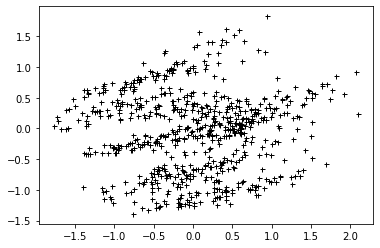

Hyperparameters: [ e: 0.06 , n: 10 ]
V-measure: 0.000


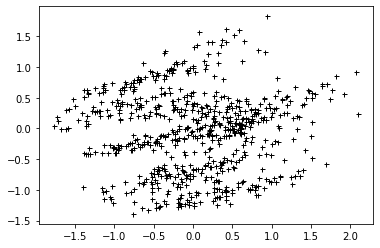

Hyperparameters: [ e: 0.09 , n: 10 ]
V-measure: 0.166
Silhouette score: -0.380


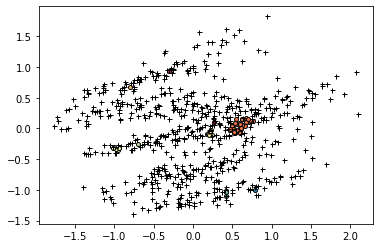

Hyperparameters: [ e: 0.12 , n: 10 ]
V-measure: 0.345
Silhouette score: -0.041


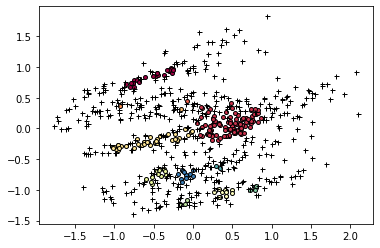

Hyperparameters: [ e: 0.15 , n: 10 ]
V-measure: 0.426
Silhouette score: 0.069


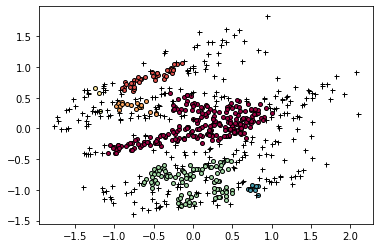

Hyperparameters: [ e: 0.18 , n: 10 ]
V-measure: 0.436
Silhouette score: 0.269


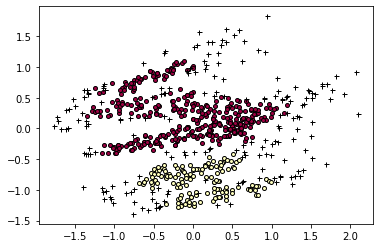

In [ ]:
for i in range(1,7):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = round(i * 0.03, 2)
    no_of_sample = 10

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    
    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
    except:
        pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

Hyperparameters: [ e: 0.16 , n: 2 ]
V-measure: 0.051
Silhouette score: -0.282


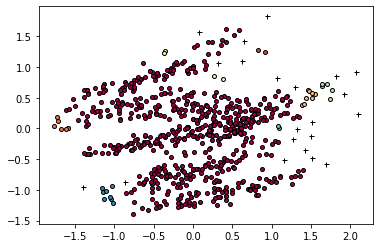

Hyperparameters: [ e: 0.16 , n: 3 ]
V-measure: 0.034
Silhouette score: -0.026


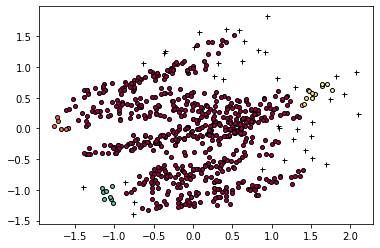

Hyperparameters: [ e: 0.16 , n: 4 ]
V-measure: 0.052
Silhouette score: -0.055


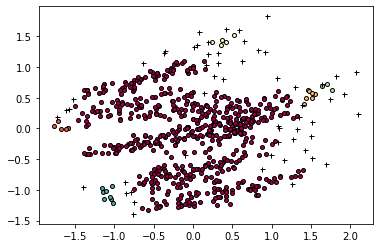

Hyperparameters: [ e: 0.16 , n: 5 ]
V-measure: 0.044
Silhouette score: -0.077


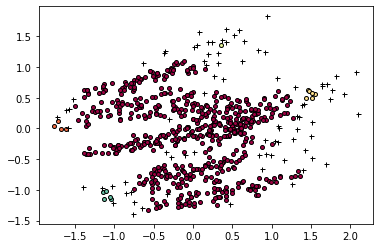

Hyperparameters: [ e: 0.16 , n: 6 ]
V-measure: 0.044
Silhouette score: -0.035


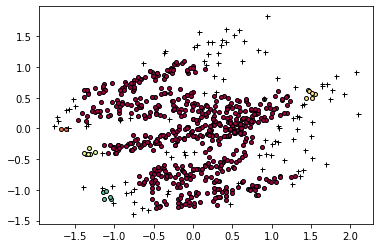

Hyperparameters: [ e: 0.16 , n: 7 ]
V-measure: 0.033
Silhouette score: -0.040


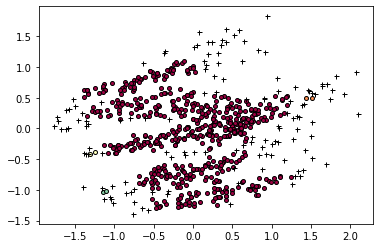

Hyperparameters: [ e: 0.16 , n: 8 ]
V-measure: 0.407
Silhouette score: 0.085


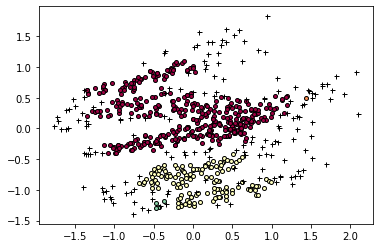

Hyperparameters: [ e: 0.16 , n: 9 ]
V-measure: 0.493
Silhouette score: 0.178


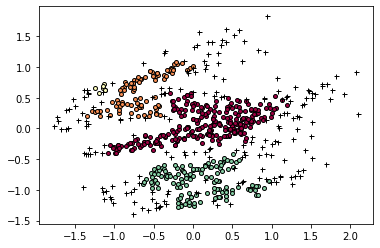

Hyperparameters: [ e: 0.16 , n: 10 ]
V-measure: 0.483
Silhouette score: 0.169


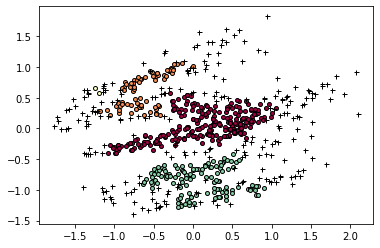

In [ ]:
for i in range(1,10):
    
    # DBSCAN 하이퍼 파라미터 설정
    epsilon = 0.16
    no_of_sample = 1 + 1 * i

    print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

    try:
        db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
        core_mask = np.zeros_like(db.labels_, dtype = bool)
        core_mask[db.core_sample_indices_] = True
        labels = db.labels_

        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
    except:
        pass
        
    unique_labels = set(labels) # 유일 label 추출
    colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors): # index, 색정보 반복
        if k == -1:
            col = [0, 0, 0, 1] # black
        class_member_mask = (labels == k)

        # Core sample 표시
        xy = X[class_member_mask & core_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=4)

        # Noise sample 표시
        xy = X[class_member_mask & ~core_mask]
        plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=5)
    plt.show()

--best--

e : 0.16 / n : 9

실루엣 score : 0.178

Hyperparameters: [ e: 0.16 , n: 9 ]
V-measure: 0.493
Silhouette score: 0.178


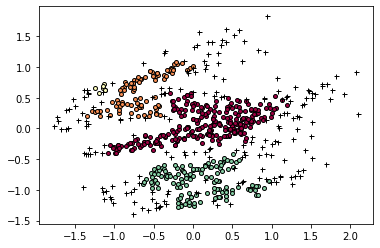

In [ ]:
epsilon = 0.16
no_of_sample = 9

print("Hyperparameters: [ e:", epsilon , ", n:",no_of_sample, "]")

try:
    db = DBSCAN(eps = epsilon, min_samples = no_of_sample).fit(X)
    core_mask = np.zeros_like(db.labels_, dtype = bool)
    core_mask[db.core_sample_indices_] = True
    labels = db.labels_

    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Silhouette score: %0.3f" % metrics.silhouette_score(X, labels))
except:
    pass
    
unique_labels = set(labels) # 유일 label 추출
colors = [plt.cm.Spectral(each) # 각 label 별 색 추출
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors): # index, 색정보 반복
    if k == -1:
        col = [0, 0, 0, 1] # black
    class_member_mask = (labels == k)

    # Core sample 표시
    xy = X[class_member_mask & core_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=4)

    # Noise sample 표시
    xy = X[class_member_mask & ~core_mask]
    plt.plot(xy[:, 0], xy[:, 1], '+', markerfacecolor=tuple(col),
              markeredgecolor='k', markersize=5)
plt.show()

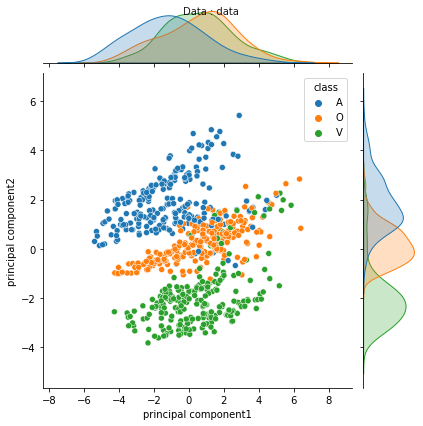

In [ ]:
#실제 데이터
Simple_Scatter(principalDf, "data")